<a href="https://colab.research.google.com/github/sakethyalamanchili/SimpleML-Projects/blob/main/Most_Streamed_Spotify_Songs_2024(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Most Streamed Spotify Songs 2024

The dataset presents a comprehensive compilation of the most streamed songs on Spotify in 2024. It provides extensive insights into each track's attributes, popularity, and presence on various music platforms, offering a valuable resource for music analysts, enthusiasts, and industry professionals. The dataset includes information such as track name, artist, release date, ISRC, streaming statistics, and presence on platforms like YouTube, TikTok, and more.

![6 step procedure](https://github.com/sakethyalamanchili/House-Price-Prediction/raw/main/6-step-procedure.png)

## 1. Problem Definition
Classify tracks into explicit or non-explicit categories using supervised learning classification models.

## 2. Data
This dataset is taken from Kaggle. You can find it [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/data).

## 3. Evaluation
An accuracy of over 92% is considered good.

## 4. Features
1. **Track Name:** Name of the song.
2. **Album Name:** Name of the album the song belongs to.
3. **Artist:** Name of the artist(s) of the song.
4. **Release Date:** Date when the song was released.
5. **ISRC:** International Standard Recording Code for the song.
6. **All Time Rank:** Ranking of the song based on its all-time popularity.
7. **Track Score:** Score assigned to the track based on various factors.
8. **Spotify Streams:** Total number of streams on Spotify.
9. **Spotify Playlist Count:** Number of Spotify playlists the song is included in.
10. **Spotify Playlist Reach:** Reach of the song across Spotify playlists.
11. **Spotify Popularity:** Popularity score of the song on Spotify.
12. **YouTube Views:** Total views of the song's official video on YouTube.
13. **YouTube Likes:** Total likes on the song's official video on YouTube.
14. **TikTok Posts:** Number of TikTok posts featuring the song.
15. **TikTok Likes:** Total likes on TikTok posts featuring the song.
16. **TikTok Views:** Total views on TikTok posts featuring the song.
17. **YouTube Playlist Reach:** Reach of the song across YouTube playlists.
18. **Apple Music Playlist Count:** Number of Apple Music playlists the song is included in.
19. **AirPlay Spins:** Number of times the song has been played on radio stations.
20. **SiriusXM Spins:** Number of times the song has been played on SiriusXM.
21. **Deezer Playlist Count:** Number of Deezer playlists the song is included in.
22. **Deezer Playlist Reach:** Reach of the song across Deezer playlists.
23. **Amazon Playlist Count:** Number of Amazon Music playlists the song is included in.
24. **Pandora Streams:** Total number of streams on Pandora.
25. **Pandora Track Stations:** Number of Pandora stations featuring the song.
26. **Soundcloud Streams:** Total number of streams on Soundcloud.
27. **Shazam Counts:** Total number of times the song has been Shazamed.
28. **TIDAL Popularity:** Popularity score of the song on TIDAL.
29. **Explicit Track:** Indicates whether the song contains explicit content.

## 5. Modelling
We'll try using different models to classify the tracks:

### Supervised Machine Learning Classifiers
1. **Logistic Regression:** Used for binary classification problems.
2. **Decision Trees:** Non-linear models that split the data into subsets based on feature values.
3. **Random Forest:** An ensemble of decision trees, often used for both classification and regression.
4. **Gradient Boosting Machines (GBM):**
     - **XGBoost:** An efficient and scalable implementation of gradient boosting framework.
     - **CatBoost:** Gradient boosting with categorical feature support.
     - **LightGBM:** A gradient boosting framework that uses tree-based learning algorithms.
5. **Support Vector Machines (SVM):** Used for classification tasks, particularly in high-dimensional spaces.
6. **Naive Bayes:**
    - **Gaussian Naive Bayes:** Assumes that features follow a normal distribution.
    - **Multinomial Naive Bayes:** Used for discrete features like word counts in text classification.
7. **AdaBoostClassifier:** An ensemble method that combines multiple weak classifiers to create a strong classifier.
8. **GradientBoostingClassifier:** A boosting method that builds an additive model in a forward stage-wise fashion.
9. **Neural Network (Sequential)**

## 6. Experiments

We will experiment with both baseline modeling and hyperparameter tuning to better understand the models and optimize their performance.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Install lightgbm, xgboost, catboost & category_encoder if not already installed
!pip install lightgbm xgboost catboost
!pip install category_encoders
!pip install scikit-learn==1.2.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import lightgbm
import catboost
import warnings
import joblib
import tensorflow as tf
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Read the CSV file with a specific encoding to handle special characters correctly
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/Most-Streamed-Spotify-Songs-2024.csv", encoding="ISO-8859-1")

In [4]:
data.head(5)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [5]:
data.tail(5)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0
4599,Me Acostumbre (feat. Bad Bunny),Me Acostumbre (feat. Bad Bunny),Arcï¿½ï¿½,4/11/2017,USB271700107,"4,593",19.4,"255,740,653","32,138","14,066,526",...,NaN,4.0,"127,479",4.0,"69,006,739","11,320",NaN,"767,006",NaN,1


In [6]:
data.shape

(4600, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [8]:
data.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


## Data Cleaning
It is one of the most important steps for any Machine Learning Problem.

In [9]:
# Convert to datetime object
data["Release Date"] = pd.to_datetime(data['Release Date'], format='%m/%d/%Y')

# Extract useful information
data["Release Year"] = data["Release Date"].dt.year
data["Release Month"] = data["Release Date"].dt.month
data["Release Day"] = data["Release Date"].dt.day
data["Release DayofWeek"] = data["Release Date"].dt.dayofweek

data = data.drop(columns=["Release Date"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   ISRC                        4600 non-null   object 
 4   All Time Rank               4600 non-null   object 
 5   Track Score                 4600 non-null   float64
 6   Spotify Streams             4487 non-null   object 
 7   Spotify Playlist Count      4530 non-null   object 
 8   Spotify Playlist Reach      4528 non-null   object 
 9   Spotify Popularity          3796 non-null   float64
 10  YouTube Views               4292 non-null   object 
 11  YouTube Likes               4285 non-null   object 
 12  TikTok Posts                3427 non-null   object 
 13  TikTok Likes                3620 

In [11]:
# Find duplicate rows in the entire DataFrame
duplicated_rows = data[data.duplicated()]
duplicated_rows

,Track,Album Name,Artist,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month,Release Day,Release DayofWeek
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,TCAGJ2289254,"2,424",28.9,"227,893,586","28,139","12,480,714",73.0,...,"56,972,562","26,968","1,336,043","708,143",NaN,0,2022,9,2,4
3450,Dembow,Dembow,Danny Ocean,USWL11700269,"3,441",23.3,"579,189,526","60,397","11,805,084",65.0,...,"6,723,858","7,832",NaN,"1,619,550",NaN,0,2017,12,8,4


In [12]:
# Find duplicates based on specific columns (e.g., 'Track Name' and 'Artist')
duplicated_columns = data[data.duplicated(subset=["Track", "Artist"])]
duplicated_columns

,Track,Album Name,Artist,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month,Release Day,Release DayofWeek
22,Danza Kuduro - Cover,CLUB DE YOKUKIKU YOUGAKU MEDLEY,MUSIC LAB JPN,TCJPA2445163,23,279.0,"1,655,575,417",10,655,NaN,...,NaN,NaN,NaN,NaN,NaN,1,2024,5,21,1
47,Danza Kuduro - Cover,GEKIATU BEST AGE SONG - CLUB SONG,MUSIC LAB JPN,TCJPA2415647,48,204.4,"1,655,575,417",9,85,NaN,...,NaN,NaN,NaN,NaN,NaN,1,2024,5,2,3
58,Danza Kuduro - Cover,YOUGAKU MORIMORI CLUB MEDLEY,MUSIC LAB JPN,TCJPA2420090,59,190.0,"1,655,575,417",1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,1,2024,4,29,0
157,Too Sweet,Unreal Unearth: Unheard,Hozier,IEACJ2300335,158,121.2,"532,012,790","22,396","130,752,527",85.0,...,NaN,NaN,"119,813","2,580,089",NaN,0,2024,3,22,4
223,Gata Only,Gata Only - Single,FloyyMenor,QZNN22329474,224,103.1,"4,674,619","1,841","61,398",NaN,...,NaN,NaN,NaN,NaN,NaN,0,2023,12,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,Kill Bill,Kill Bill (Official Video),SZA,USRV82300033,"4,291",20.3,"1,873,746,537",1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2023,1,10,1
4394,From The Start,Bewitched,Laufey,QMDA62312093,"4,371",20.1,"367,151,355","16,239","5,016,080",82.0,...,NaN,NaN,NaN,NaN,NaN,0,2023,9,8,4
4501,Animals,Tremor (Sensation 2014 Anthem),Martin Garrix,AUNV01400494,"4,472",19.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2014,1,1,2
4522,Smells Like Teen Spirit,Nevermind (30th Anniversary Edition Super Deluxe),Nirvana,USGF19942501,"4,510",19.6,"2,021,910,364","410,054","113,406,994",77.0,...,"691,979,509","317,966","13,047,851","12,775,440",NaN,0,1991,9,24,1


In [13]:
data = data.drop_duplicates(subset=["Track", "Artist"])
data

,Track,Album Name,Artist,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month,Release Day,Release DayofWeek
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,...,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,2024,4,26,4
1,Not Like Us,Not Like Us,Kendrick Lamar,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,...,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,2024,5,4,5
2,i like the way you kiss me,I like the way you kiss me,Artemas,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,...,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,2024,3,19,1
3,Flowers,Flowers - Single,Miley Cyrus,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,...,"190,260,277","203,384",NaN,"11,822,942",NaN,0,2023,1,12,3
4,Houdini,Houdini,Eminem,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,...,"4,493,884","7,006","207,179","457,017",NaN,1,2024,5,31,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",71.0,...,"20,104,066","13,184","50,633,006","656,337",NaN,1,2017,9,5,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",56.0,...,NaN,NaN,NaN,"193,590",NaN,0,2018,7,27,4
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",65.0,...,"84,426,740","28,999",NaN,"1,135,998",NaN,1,2020,2,28,4
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",66.0,...,"6,817,840",NaN,NaN,"448,292",NaN,0,2016,11,8,1


In [14]:
# Find all duplicate rows, including the first occurrence
data[data.duplicated(keep=False)]

,Track,Album Name,Artist,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month,Release Day,Release DayofWeek


> ***Consider removing COLUMNS with more than 50% missing data.***

In [15]:
# Count of null values in each column
null_data_count = data.isnull().sum()

# Calculate percentage of null values for each column
column_null_percentage = (null_data_count / len(data)) * 100

# Identify columns with null percentage greater than or equal to 50%
columns_to_drop = column_null_percentage[column_null_percentage >= 50].index

# Drop the identified columns
data = data.drop(columns=columns_to_drop)

# Print the number of columns after dropping
print(f"Number of columns after dropping: {data.shape[1]}")

Number of columns after dropping: 30


In [16]:
data.shape

(4488, 30)

**Column-wise Null Percentages which are dropped!**
- **Column:** Soundcloud Streams --- **Null Percentage:** 72.04%
- **Column:** TIDAL Popularity --- **Null Percentage:** 100.00%

> ***Consider removing ROWS with more than 30% missing data.***

In [17]:
# Count of null values in each row
row_null_count = data.isnull().sum(axis=1)

# Calculate percentage of null values for each row
row_null_percentage = (row_null_count / data.shape[1]) * 100

# Identify rows where the null percentage is greater than or equal to 30%
rows_to_drop = row_null_percentage[row_null_percentage >= 30].index

# Drop the identified rows from the DataFrame
data = data.drop(index=rows_to_drop)

# Print the number of rows after dropping
print(f"Number of rows after dropping: {data.shape[0]}")

Number of rows after dropping: 3984


- **Total Rows to be dropped are: 46**
- Index([ 316,  446,  514,  553,  713,  787,  838,  870,  913,  951, 1056, 1087,
       1878, 2168, 2315, 2352, 2417, 2593, 2613, 2670, 2732, 2781, 2790, 2910,
       2939, 2962, 3343, 3433, 3483, 3491, 3507, 3549, 3553, 3579, 3630, 3886,
       3900, 3964, 4138, 4143, 4172, 4188, 4438, 4491, 4550, 4552],
      dtype='int64')

In [18]:
data.shape

(3984, 30)

In [19]:
# Lists to hold feature names
categorical_data = []
numerical_data = []

# Iterate over each column in the DataFrame
for column in data.columns:
    # Check the number of unique values in the column
    if data[column].nunique() < 10:
        categorical_data.append(column)
    else:
        numerical_data.append(column)

# Print the lists
print("Categorical Features:", categorical_data)
print("Numerical Features:", numerical_data)

Categorical Features: ['Explicit Track', 'Release DayofWeek']
Numerical Features: ['Track', 'Album Name', 'Artist', 'ISRC', 'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Shazam Counts', 'Release Year', 'Release Month', 'Release Day']


> ***As `Explicit Track` is our target variable, we can consider that there are no other categorical features.***

In [20]:
numerical_features = []

for feature in data.columns:
    if data[feature].dtypes != "O" and feature != "Explicit Track":
        numerical_features.append(feature)

numerical_features

['Track Score',
 'Spotify Popularity',
 'Apple Music Playlist Count',
 'Deezer Playlist Count',
 'Amazon Playlist Count',
 'Release Year',
 'Release Month',
 'Release Day',
 'Release DayofWeek']

***When deciding whether to replace null values with the mean or median, you need to consider the nature of the data and its distribution:***

1. **Mean**
- **Use Case:** Suitable for normally distributed numerical data without extreme outliers
- **Reason:** The mean is affected by extreme values (outliers), which can skew the average. It works best if the data distribution is fairly symmetrical.
2. **Median**
- **Use Case:** Suitable for data with outliers or skewed distributions.
- **Reason:** The median is the middle value when data is sorted and is less affected by extreme values. It provides a better central tendency measure for skewed data.

In [21]:
# Replace null values based on distribution
for feature in numerical_features:
    skewness = data[feature].skew()
    if skewness > 1 or skewness < -1:
        # Data is skewed (positive or negative), use median
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        # Data is fairly symmetrical, use mean
        data[feature].fillna(data[feature].mean(), inplace=True)

### Understanding Skewness

Skewness measures the asymmetry of a distribution, indicating how data leans towards higher or lower values.

**Types of Skewness**

1. **Positive Skew (Right Skew)**
   - **Description**: Right tail is longer or fatter.
   - **Example**: Income distribution.
   - **Skewness Value**: > 1
   - **Handling Nulls**: Use **median** (more robust to outliers).

2. **Negative Skew (Left Skew)**
   - **Description**: Left tail is longer or fatter.
   - **Example**: Age at retirement.
   - **Skewness Value**: < -1
   - **Handling Nulls**: Use **median** (more robust to outliers).

3. **Symmetrical Distribution**
   - **Description**: Tails on both sides are of equal length.
   - **Example**: Normal distribution.
   - **Skewness Value**: Between -1 and 1
   - **Handling Nulls**: Use **mean** (suitable for balanced data).

**Why This Approach?**

- **Median**: Preferred for skewed distributions (less affected by outliers).
- **Mean**: Appropriate for symmetrical distributions (considers all values).

In [22]:
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    data[feature].fillna('Unknown', inplace=True)

In [23]:
data.isna().sum()

,0
Track,0
Album Name,0
Artist,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0
Spotify Popularity,0


In [24]:
categorical_features

Index(['Track', 'Album Name', 'Artist', 'ISRC', 'All Time Rank',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
       'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams',
       'Pandora Track Stations', 'Shazam Counts'],
      dtype='object')

We have addressed the missing values in our dataset as follows:

- **For numeric data (float or int):** We replaced null values with either the mean or median of the respective columns, depending on the distribution of the data.
- **For categorical data (object type):** We replaced null values with the placeholder value "Unknown" to ensure that all data points are accounted for.

Our data now has no missing values and is ready for further processing and analysis.



> It is generally a good practice to split the data into training and testing sets before applying preprocessing techniques like encoding. This helps to prevent data leakage, ensuring that the information from the test set does not influence the training process, leading to more reliable and unbiased evaluation of your model's performance.

In [25]:
X = data.drop(columns=["Explicit Track"])
y = data["Explicit Track"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((3187, 29), (3187,)), ((797, 29), (797,)))

In [27]:
# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# Check cardinality
cardinality = {col: len(X_train[col].unique()) for col in categorical_features}

# Print cardinality of each categorical feature
print("Cardinality of categorical features:")
for feature, count in cardinality.items():
    print(f"{feature}: {count} unique values")

Cardinality of categorical features:
Track: 3128 unique values
Album Name: 2828 unique values
Artist: 1433 unique values
ISRC: 3187 unique values
All Time Rank: 3187 unique values
Spotify Streams: 3181 unique values
Spotify Playlist Count: 3133 unique values
Spotify Playlist Reach: 3187 unique values
YouTube Views: 3130 unique values
YouTube Likes: 3127 unique values
TikTok Posts: 2589 unique values
TikTok Likes: 2782 unique values
TikTok Views: 2783 unique values
YouTube Playlist Reach: 2659 unique values
AirPlay Spins: 2598 unique values
SiriusXM Spins: 621 unique values
Deezer Playlist Reach: 2794 unique values
Pandora Streams: 2708 unique values
Pandora Track Stations: 2352 unique values
Shazam Counts: 2996 unique values


In [28]:
# Initialize KFold and TargetEncoder
kf = KFold(n_splits=5, shuffle=True, random_state=42)
target_encoder = TargetEncoder()
scaler = MinMaxScaler()

# Perform K-Fold Target Encoding on training data
X_train_encoded = X_train.copy()
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    target_encoder.fit(X_train_fold[categorical_features], y_train_fold)
    X_train_encoded.iloc[val_index, X_train.columns.get_indexer(categorical_features)] = target_encoder.transform(X_val_fold[categorical_features])

# Identify numerical features explicitly if needed
numerical_features = X_train.columns.difference(categorical_features)

# Combine numerical and target-encoded categorical features for scaling
X_train_encoded[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])

# Encode and scale the test set
target_encoder.fit(X_train[categorical_features], y_train)
X_test_encoded = X_test.copy()
X_test_encoded[categorical_features] = target_encoder.transform(X_test[categorical_features])

# Scale the numeric features of the test data
X_test_encoded[numerical_features] = scaler.transform(X_test_encoded[numerical_features])

# Ensure all columns are of consistent type (float)
X_train_encoded = X_train_encoded.apply(pd.to_numeric, errors='coerce')
X_test_encoded = X_test_encoded.apply(pd.to_numeric, errors='coerce')

# Optionally, convert to DataFrames if needed (already DataFrames)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns)

# Verify dtypes
print(X_train_encoded.dtypes)
print(X_test_encoded.dtypes)

Track                         float64
Album Name                    float64
Artist                        float64
ISRC                          float64
All Time Rank                 float64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
AirPlay Spins                 float64
SiriusXM Spins                float64
Deezer Playlist Count         float64
Deezer Playlist Reach         float64
Amazon Playlist Count         float64
Pandora Streams               float64
Pandora Track Stations        float64
Shazam Counts                 float64
Release Year                  float64
Release Mont

### How Target Encoding Transforms X_train
- **In the K-Fold Process:** Each fold's validation set is transformed using the encoder fitted only on the training data of that fold, which ensures no information from the validation data leaks into the encoding process.
- **After K-Fold Encoding:** The entire training data is target-encoded using a final fit on the entire training data to ensure consistency when encoding the test set.

### Why Scale/Normalize After Target Encoding?
- **Ensure Consistent Scaling:** After applying target encoding, your features might have a different range or distribution compared to their original form. Scaling ensures that all features contribute equally to the model, preventing some features from dominating due to their scale.

- **Improve Model Performance:** Many machine learning algorithms perform better with normalized data, especially those that are sensitive to feature scales, such as gradient descent-based algorithms, SVMs, and K-nearest neighbors.

- **Prevent Data Leakage:** Scaling after target encoding helps avoid data leakage, ensuring that the scaling parameters are fit on the training data and then applied to both training and test data. This maintains the integrity of the cross-validation process.

In [29]:
X_train_encoded

,Track,Album Name,Artist,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Release Year,Release Month,Release Day,Release DayofWeek
640,0.389565,0.389565,0.312502,0.389565,0.389565,0.058074,0.389565,0.389565,0.389565,0.819149,...,0.007924,0.389565,0.110048,0.389565,0.389565,0.389565,0.961538,0.909091,0.300000,0.666667
1802,0.387451,0.387451,0.467149,0.387451,0.387451,0.021246,0.387451,0.387451,0.387451,0.755319,...,0.022187,0.387451,0.000000,0.387451,0.387451,0.387451,0.923077,0.545455,0.466667,0.666667
691,0.388627,0.388627,0.388627,0.388627,0.388627,0.055099,0.388627,0.388627,0.388627,0.553191,...,0.004754,0.388627,0.124402,0.388627,0.388627,0.388627,0.961538,0.636364,0.100000,0.666667
508,0.381569,0.462032,0.462032,0.381569,0.381569,0.069830,0.381569,0.381569,0.381569,0.723404,...,0.022187,0.381569,0.028708,0.381569,0.381569,0.381569,0.807692,0.454545,0.900000,0.666667
2029,0.387451,0.387451,0.467149,0.387451,0.387451,0.017989,0.387451,0.387451,0.387451,0.808511,...,0.022187,0.264822,0.081340,0.387451,0.403416,0.387451,0.961538,0.909091,0.533333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,0.389565,0.389565,0.389565,0.389565,0.389565,0.031586,0.389565,0.389565,0.389565,0.723404,...,0.007924,0.389565,0.000000,0.389565,0.338879,0.389565,0.961538,0.454545,0.000000,0.500000
1469,0.388627,0.388627,0.468172,0.388627,0.388627,0.026771,0.388627,0.388627,0.388627,0.712766,...,0.000000,0.388627,0.071770,0.388627,0.388627,0.388627,0.961538,0.363636,0.833333,0.666667
976,0.388627,0.388627,0.388627,0.388627,0.388627,0.041926,0.388627,0.388627,0.388627,0.393617,...,0.001585,0.388627,0.081340,0.388627,0.388627,0.388627,0.846154,0.090909,0.433333,0.666667
4032,0.396626,0.396626,0.396626,0.396626,0.396626,0.002691,0.396626,0.396626,0.396626,0.627660,...,0.026941,0.396626,0.004785,0.297814,0.267932,0.396626,0.961538,0.272727,0.433333,0.666667


In [30]:
X_test_encoded

,Track,Album Name,Artist,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Release Year,Release Month,Release Day,Release DayofWeek
471,0.388767,0.388767,0.310817,0.388767,0.388767,0.073229,0.388767,0.388767,0.388767,0.776596,...,0.207607,0.388767,0.373206,0.279167,0.256623,0.388767,0.961538,0.181818,0.300000,0.666667
2918,0.388767,0.388767,0.305507,0.388767,0.388767,0.009207,0.388767,0.388767,0.388767,0.734043,...,0.015848,0.388767,0.038278,0.388767,0.388767,0.388767,0.769231,1.000000,0.666667,0.666667
776,0.388767,0.388767,0.388767,0.388767,0.388767,0.050567,0.388767,0.388767,0.388767,0.776596,...,0.001585,0.388767,0.043062,0.388767,0.388767,0.388767,0.846154,0.090909,0.666667,0.666667
3627,0.388767,0.388767,0.333620,0.388767,0.388767,0.004533,0.388767,0.388767,0.388767,0.595745,...,0.025357,0.388767,0.105263,0.388767,0.388767,0.388767,0.923077,0.090909,0.100000,0.666667
2703,0.388767,0.388767,0.298777,0.388767,0.388767,0.010907,0.388767,0.388767,0.388767,0.691489,...,0.017433,0.388767,0.062201,0.388767,0.388767,0.388767,0.730769,0.636364,0.800000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,0.388767,0.475471,0.704291,0.388767,0.388767,0.003966,0.388767,0.388767,0.388767,0.638298,...,0.019017,0.388767,0.081340,0.388767,0.388767,0.388767,0.769231,1.000000,0.733333,1.000000
576,0.388767,0.388767,0.553153,0.388767,0.388767,0.062748,0.388767,0.388767,0.388767,0.819149,...,0.095087,0.388767,0.119617,0.388767,0.388767,0.388767,0.846154,0.000000,0.533333,0.666667
4592,0.388767,0.388767,0.388767,0.388767,0.388767,0.000000,0.388767,0.388767,0.388767,0.702128,...,0.012678,0.388767,0.000000,0.279167,0.256623,0.388767,0.961538,1.000000,0.000000,0.666667
3364,0.388767,0.388767,0.509679,0.388767,0.388767,0.006091,0.388767,0.388767,0.388767,0.627660,...,0.004754,0.388767,0.081340,0.388767,0.388767,0.388767,0.961538,0.363636,0.133333,0.666667


In [31]:
y_train

,Explicit Track
640,0
1802,1
691,1
508,1
2029,0
...,...
1286,1
1469,1
976,1
4032,0


In [32]:
y_test

,Explicit Track
471,0
2918,0
776,1
3627,0
2703,0
...,...
3748,1
576,1
4592,0
3364,1


In [33]:
(X_train_encoded.shape, X_test_encoded.shape), (y_train.shape, y_test.shape)

(((3187, 29), (797, 29)), ((3187,), (797,)))

## Modelling
Here we are going to try to types of modelling techniques:
1. **Baseline modelling** using Cross Validation.
2. **Hyperparameter Tuning** using Grid Search CV.

### 1. Baseline Modelling

In [34]:
baseline_models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(),
    "LightGBM": LGBMClassifier(),
    "SVM": SVC(),
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

In [35]:
baseline_models_accuracy = {}

for model_name, model in baseline_models.items():
    np.random.seed(42)
    score = cross_val_score(model, X_train_encoded, y_train, cv=5, n_jobs=-1)
    baseline_models_accuracy[model_name] = np.mean(score)
    print(f"{model_name}: {baseline_models_accuracy[model_name]}\n")

LogisticRegression: 0.787265936034409

DecisionTree: 0.7110077115003224

RandomForest: 0.7922875154402248

XGBoost: 0.7709467872029447

CatBoost: 0.7938563899155031

LightGBM: 0.7866370083118852

SVM: 0.7866384846680413

GaussianNB: 0.7103748468280487

MultinomialNB: 0.611233101873496

AdaBoost: 0.784123265896665

GradientBoosting: 0.7900882368862665



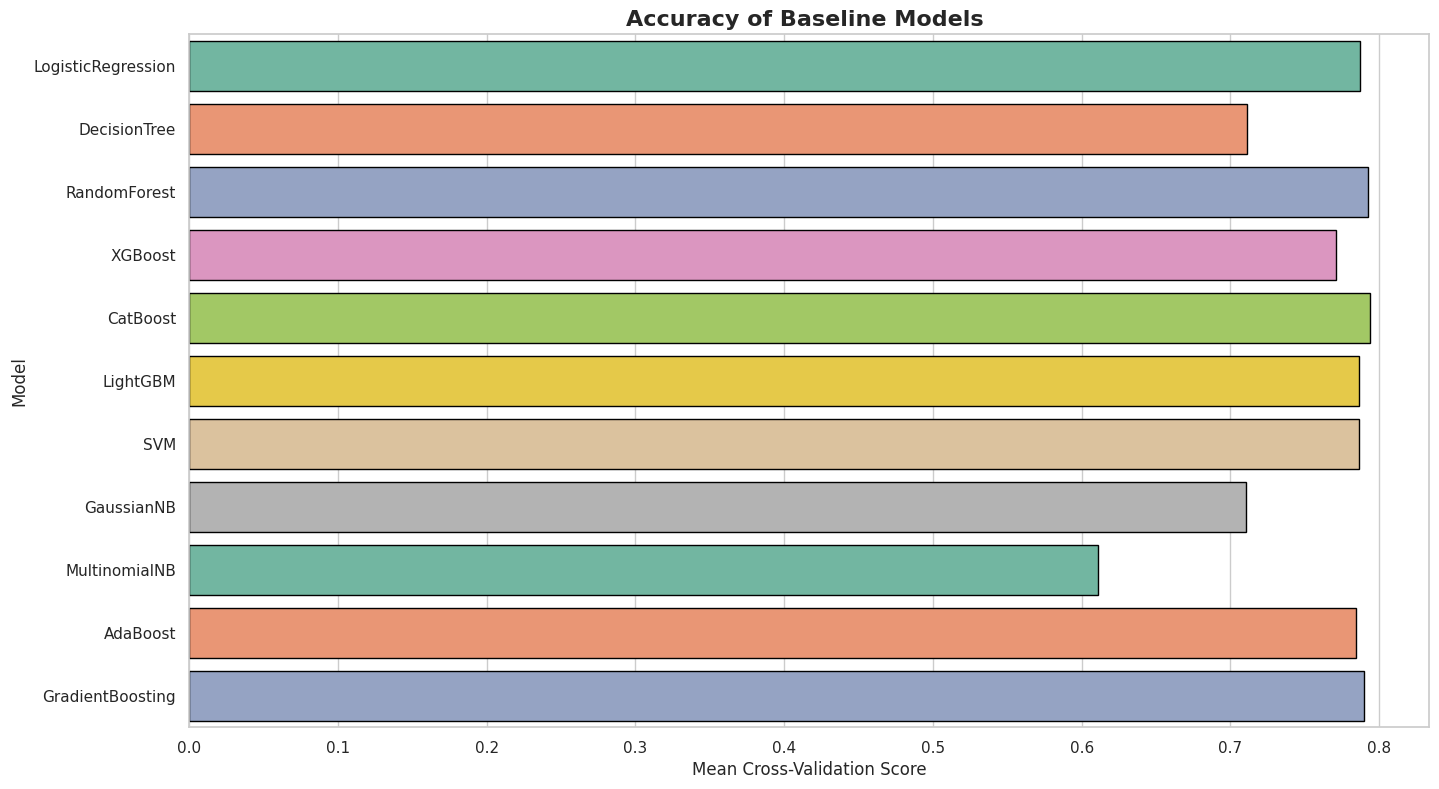

In [36]:
plt.figure(figsize=(16, 9))
color = sns.color_palette("Set2")
sns.set(style="whitegrid")
sns.barplot(y=list(baseline_models_accuracy.keys()), x=list(baseline_models_accuracy.values()), palette=color, edgecolor="black")
plt.title("Accuracy of Baseline Models ", fontsize=16, fontweight='bold')
plt.xlabel("Mean Cross-Validation Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

## Hyperparameter Tuning

### 1. Logistic Regression

In [37]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
# lgr_param = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear','saga'],
#     'max_iter': [100, 1000, 5000],
#     'random_state': [42]
# }

# lgr_gridcv = GridSearchCV(LogisticRegression(), param_grid=lgr_param, cv=3, n_jobs=-1)

# lgr_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(lgr_gridcv, 'logistic_regression_model.pkl')

In [39]:
# lgr_gridcv.best_params_

In [40]:
# Load the model from the file
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/logistic_regression_model.pkl')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_encoded)

lgr_accuracy = loaded_model.score(X_test_encoded, y_test)
lgr_accuracy

0.7779171894604768

In [41]:
import sklearn
sklearn.__version__

'1.2.2'

In [42]:
# !pip install scikit-learn==1.2.2
# Latest 1.3.2

### 2. Random Forest

In [43]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
# rf_param = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 30, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'bootstrap': [True, False],
#     'random_state': [42]
# }


# rf_gridcv = GridSearchCV(RandomForestClassifier(), param_grid=rf_param, cv=3, n_jobs=-1)

# rf_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(rf_gridcv, 'random_forest_model.pkl')

In [45]:
# rf_gridcv.best_params_

In [46]:
# Load the model from the file
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/random_forest_model.pkl')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_encoded)

rf_accuracy = loaded_model.score(X_test_encoded, y_test)
rf_accuracy

0.7716436637390214

### 3. Support Vector Machines (SVM)

In [47]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [48]:
# svc_param = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'Poly', 'rbf'],
#     'decision_function_shape': ['ovo', 'ovr'],
#     'random_state': [42]
# }

# svc_gridcv = GridSearchCV(SVC(), param_grid=svc_param, cv=3, n_jobs=-1)

# svc_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(svc_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/svc_model.pkl')

In [49]:
# svc_gridcv.best_params_

In [50]:
# Load the model from the file
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/svc_model.pkl')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_encoded)

svc_accuracy = loaded_model.score(X_test_encoded, y_test)
svc_accuracy

0.7691342534504392

### 4. Gaussian Naive Bayes

In [51]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [52]:
# gnb_param = {
#     'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
# }

# gnb_gridcv = GridSearchCV(GaussianNB(), param_grid=gnb_param, cv=3, n_jobs=-1)
# gnb_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(gnb_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/gaussian_naive_bayes_model.pkl')

In [53]:
# gnb_gridcv.best_params_

In [54]:
# Load the model from the file
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/gaussian_naive_bayes_model.pkl')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_encoded)

gnb_accuracy = loaded_model.score(X_test_encoded, y_test)
gnb_accuracy

0.7051442910915935

### 5. XGBoost

In [55]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [56]:
# xgb_param = {
#     'objective': ['binary:logistic'],
#     'eval_metric': ['error'],
#     'gamma': [0, 0.25, 1.0],
#     'learning_rate': [0.1, 0.5, 1],
#     'max_depth': [3,4,5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_lambda': [0, 1, 10, 20],
#     'scale_pos_weight': [1,3,5],
#     'random_state': [42]
# }

# xgb_gridcv = GridSearchCV(XGBClassifier(), param_grid=xgb_param, n_jobs=-1, cv=3)
# xgb_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(xgb_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/xgboost_model.pkl')

In [57]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/xgboost_model.pkl')

y_pred = loaded_model.predict(X_test_encoded)

xgb_accuracy = loaded_model.score(X_test_encoded, y_test)
xgb_accuracy

0.7791718946047679

### 6. CatBoost

In [58]:
# cat_param = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 5, 6],
#     'n_estimators': [10, 50, 100],
#     'l2_leaf_reg': [1, 3, 5],
#     'random_seed': [42]
# }

# cat_gridcv = GridSearchCV(CatBoostClassifier(verbose=False), param_grid=cat_param, n_jobs=-1, cv=3)
# cat_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(cat_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/catboost_model.pkl')

In [59]:
# cat_gridcv.best_params_

In [60]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/catboost_model.pkl')

y_pred = loaded_model.predict(X_test_encoded)

cat_accuracy = loaded_model.score(X_test_encoded, y_test)
cat_accuracy

0.7716436637390214

### 7. Decision Tree

In [61]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [62]:
# dt_param = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'random_state': [42],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# dt_gridcv = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_param, n_jobs=-1, cv=3)
# dt_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(dt_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/decision_tree_model.pkl')

In [63]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/decision_tree_model.pkl')

y_pred = loaded_model.predict(X_test_encoded)

dt_accuracy = loaded_model.score(X_test_encoded, y_test)
dt_accuracy

0.698870765370138

### 8. AdaBoost Classifier

In [64]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [65]:
# ada_param = {
#     'n_estimators': [50, 100, 200, 500],
#     'learning_rate': [0.01, 0.1, 1, 10],
#     'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
#     'algorithm': ['SAMME', 'SAMME.R'],
#     'random_state': [42]
# }

# ada_gridcv = GridSearchCV(AdaBoostClassifier(), param_grid=ada_param, n_jobs=-1, cv=3)
# ada_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(ada_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/adaboost_model.pkl')

In [66]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/adaboost_model.pkl')

y_pred = loaded_model.predict(X_test_encoded)

ada_accuracy = loaded_model.score(X_test_encoded, y_test)
ada_accuracy

0.7691342534504392

### 9. Gradient Boosting Classifier

In [67]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [68]:
# gb_param = {
#     'learning_rate': [0.01, 0.1, 1],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'random_state': [42],
# }

# gb_gridcv = GridSearchCV(GradientBoostingClassifier(), param_grid=gb_param, n_jobs=-1, cv=3)
# gb_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(gb_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/gradient_boosting_model.pkl')

In [69]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/gradient_boosting_model.pkl')

y_pred = loaded_model.predict(X_test_encoded)

gb_accuracy = loaded_model.score(X_test_encoded, y_test)
gb_accuracy

0.7754077791718946

In [70]:
baseline_models_accuracy

{'LogisticRegression': 0.787265936034409,
 'DecisionTree': 0.7110077115003224,
 'RandomForest': 0.7922875154402248,
 'XGBoost': 0.7709467872029447,
 'CatBoost': 0.7938563899155031,
 'LightGBM': 0.7866370083118852,
 'SVM': 0.7866384846680413,
 'GaussianNB': 0.7103748468280487,
 'MultinomialNB': 0.611233101873496,
 'AdaBoost': 0.784123265896665,
 'GradientBoosting': 0.7900882368862665}

### 10. LightGBM Classifier

In [71]:
LGBMClassifier().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [72]:
# lgbm_param = {
#     'boosting_type': ['gbdt', 'dart'],
#     'objective': ['binary', 'binary_logloss', 'auc'],
#     'learning_rate': [0.01, 0.1, 1],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'random_state': [42],
#     'colsample_bytree': [0.8, 1.0],
#     'subsample': [0.8, 1.0]
# }

# lgbm_gridcv = GridSearchCV(LGBMClassifier(), param_grid=lgbm_param, cv=3, n_jobs=-1)

# lgbm_gridcv.fit(X_train_encoded, y_train)

# joblib.dump(lgbm_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/lightgbm_model.pkl')


In [73]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/lightgbm_model.pkl')

y_pred = loaded_model.predict(X_test_encoded)

lgbm_accuracy = loaded_model.score(X_test_encoded, y_test)
lgbm_accuracy

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split


0.767879548306148

### 11. Multinomial Naive Bayes

In [74]:
MultinomialNB().get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [75]:
# np.random.seed(42)

# mnb_param = {
#     'alpha': [0.01, 0.1, 1, 10],
#     'fit_prior': [True, False],
#     'class_prior': [None, [0.5, 0.5], [0.3, 0.7]]
# }

# mnb_gridcv = GridSearchCV(MultinomialNB(), param_grid=mnb_param, cv=3, n_jobs=-1)

# mnb_gridcv.fit(X_train_encoded, y_train)
# joblib.dump(mnb_gridcv, '/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/mnb_model.pkl')

In [76]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Spotify-2024-Classification/mnb_model.pkl')

y_pred = loaded_model.predict(X_test_encoded)

mnb_accuracy = loaded_model.score(X_test_encoded, y_test)
mnb_accuracy

0.617314930991217

In [77]:
tuned_model_accuracy = {
    "LogisticRegression": lgr_accuracy,
    "DecisionTree": dt_accuracy,
    "RandomForest": rf_accuracy,
    "XGBoost": xgb_accuracy,
    "CatBoost": cat_accuracy,
    "LightGBM": lgbm_accuracy,
    "SVM": svc_accuracy,
    "GaussianNB": gnb_accuracy,
    "MultinomialNB": mnb_accuracy,
    "AdaBoost": ada_accuracy,
    "GradientBoosting": gb_accuracy
}

tuned_model_accuracy

{'LogisticRegression': 0.7779171894604768,
 'DecisionTree': 0.698870765370138,
 'RandomForest': 0.7716436637390214,
 'XGBoost': 0.7791718946047679,
 'CatBoost': 0.7716436637390214,
 'LightGBM': 0.767879548306148,
 'SVM': 0.7691342534504392,
 'GaussianNB': 0.7051442910915935,
 'MultinomialNB': 0.617314930991217,
 'AdaBoost': 0.7691342534504392,
 'GradientBoosting': 0.7754077791718946}

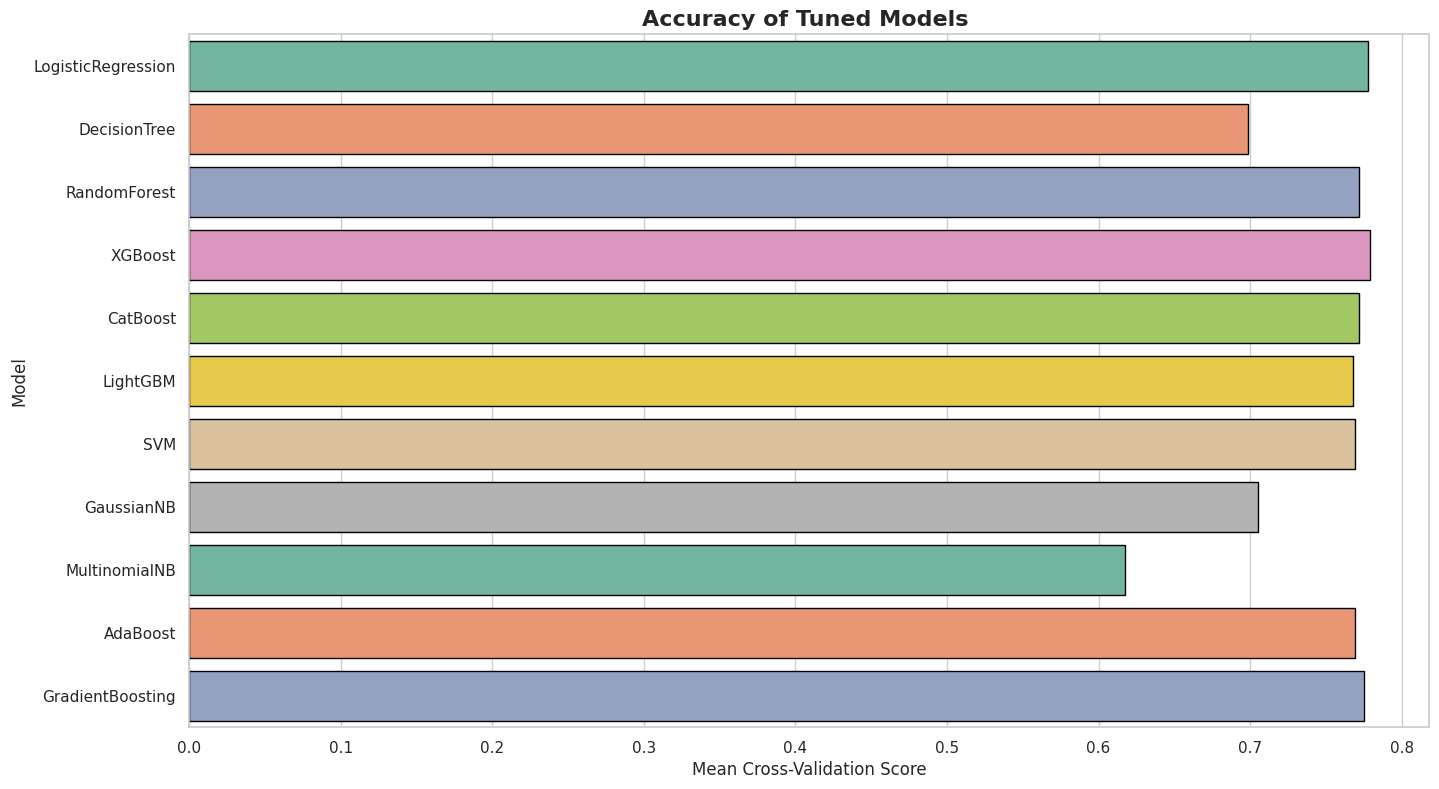

In [78]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

sns.barplot(y=list(tuned_model_accuracy.keys()), x=list(tuned_model_accuracy.values()), palette="Set2", edgecolor='black')
plt.title("Accuracy of Tuned Models ", fontsize=16, fontweight='bold')
plt.xlabel("Mean Cross-Validation Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

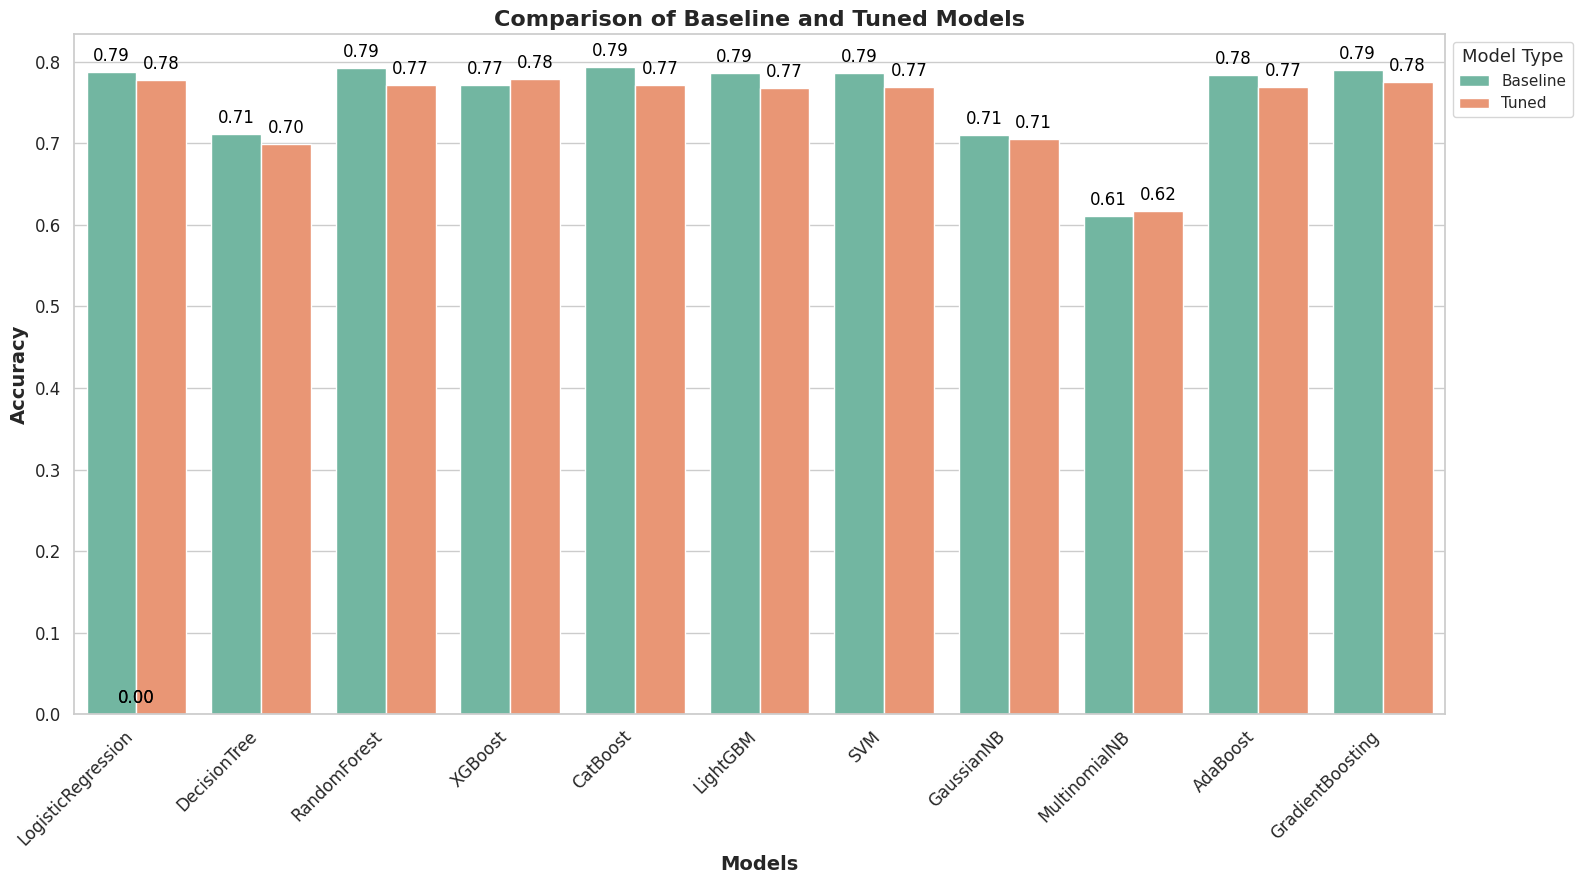

In [79]:
# Set the plot style
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 9))

# Create a DataFrame with 'Model Type' and 'Accuracy' columns
df = pd.DataFrame({
    'Model Type': ['Baseline'] * len(baseline_models_accuracy) + ['Tuned'] * len(tuned_model_accuracy),
    'Models': list(baseline_models_accuracy.keys()) + list(tuned_model_accuracy.keys()),
    'Accuracy': list(baseline_models_accuracy.values()) + list(tuned_model_accuracy.values())
})

# Create the bar plot with better aesthetics
ax = sns.barplot(x='Models', y='Accuracy', hue='Model Type', data=df, palette='Set2')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add data labels on the bars for clarity
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Adjust legend to avoid overlap
plt.legend(title='Model Type', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

# Title and labels
plt.title('Comparison of Baseline and Tuned Models', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')

# Adjust layout to fit the legend
plt.tight_layout()

# Show plot
plt.show()


From this visualization, we can confirm that baseline modeling using cross-validation performed better compared to hyperparameter tuning, which is unusual. Further research is needed to understand the reasons behind this.

In [80]:
X_train_encoded.shape

(3187, 29)

### Neural Network

In [112]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the model
tf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
tf_model.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model with validation data
history = tf_model.fit(X_train_encoded, y_train, epochs=200, verbose=0, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = tf_model.evaluate(X_test_encoded, y_test, verbose=0)

# Print the accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7616


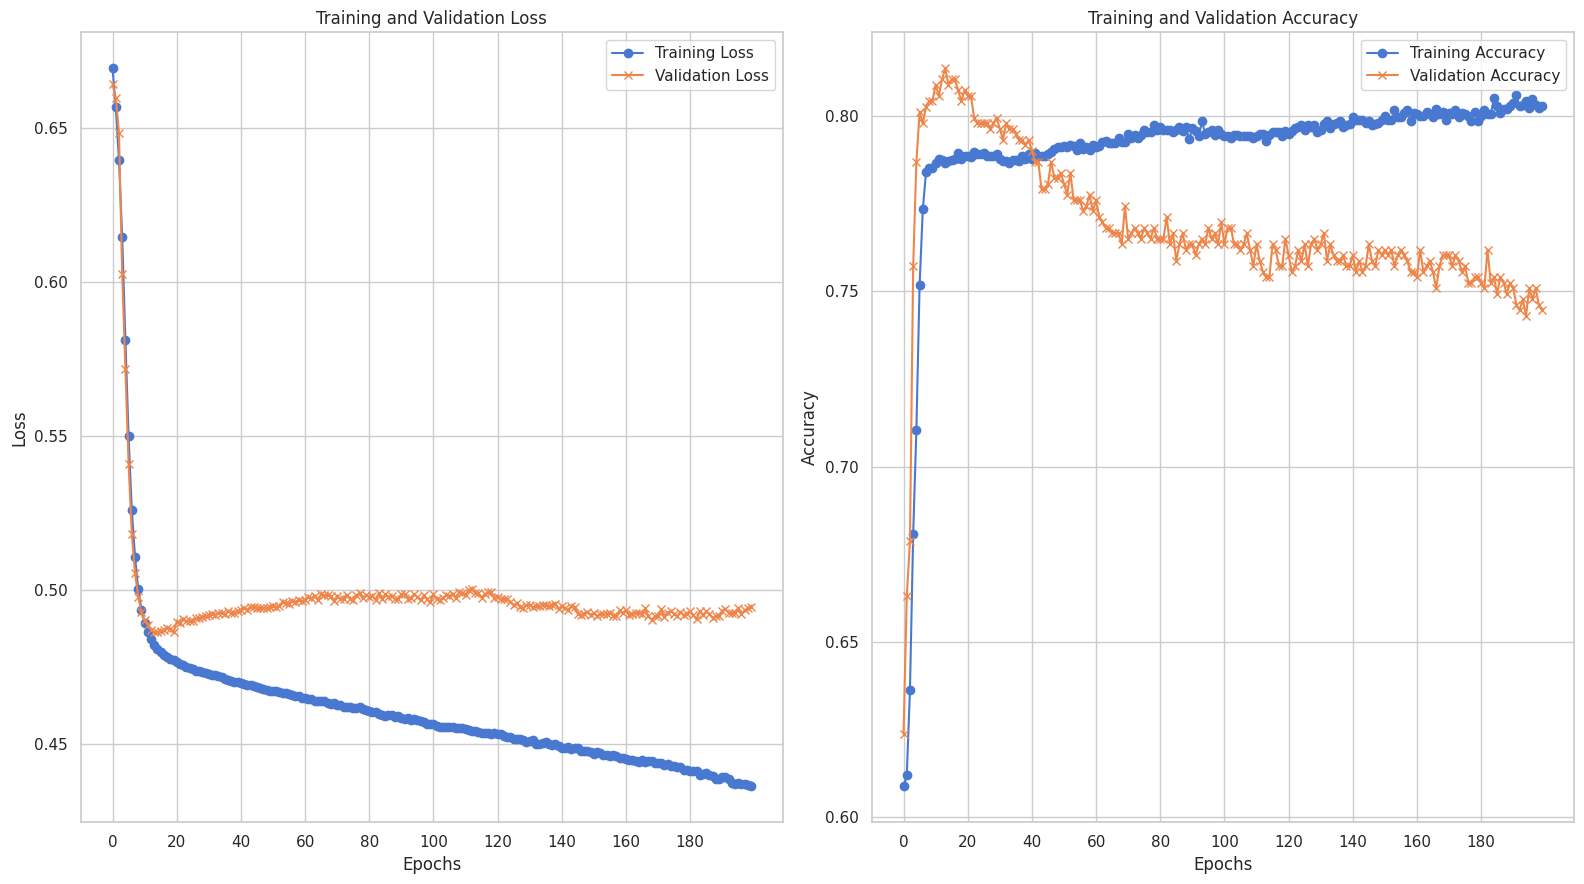

In [113]:
# Extract history metrics
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(len(loss))

# Plot results
plt.figure(figsize=(16, 9))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(range(0, len(epochs), max(1, len(epochs) // 10)))  # Adjust x-axis ticks

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(0, len(epochs), max(1, len(epochs) // 10)))  # Adjust x-axis ticks

plt.tight_layout()
plt.show()